                                                FINAL ASSIGNMENT - SUBMITTED BY DISHA MONDAL


 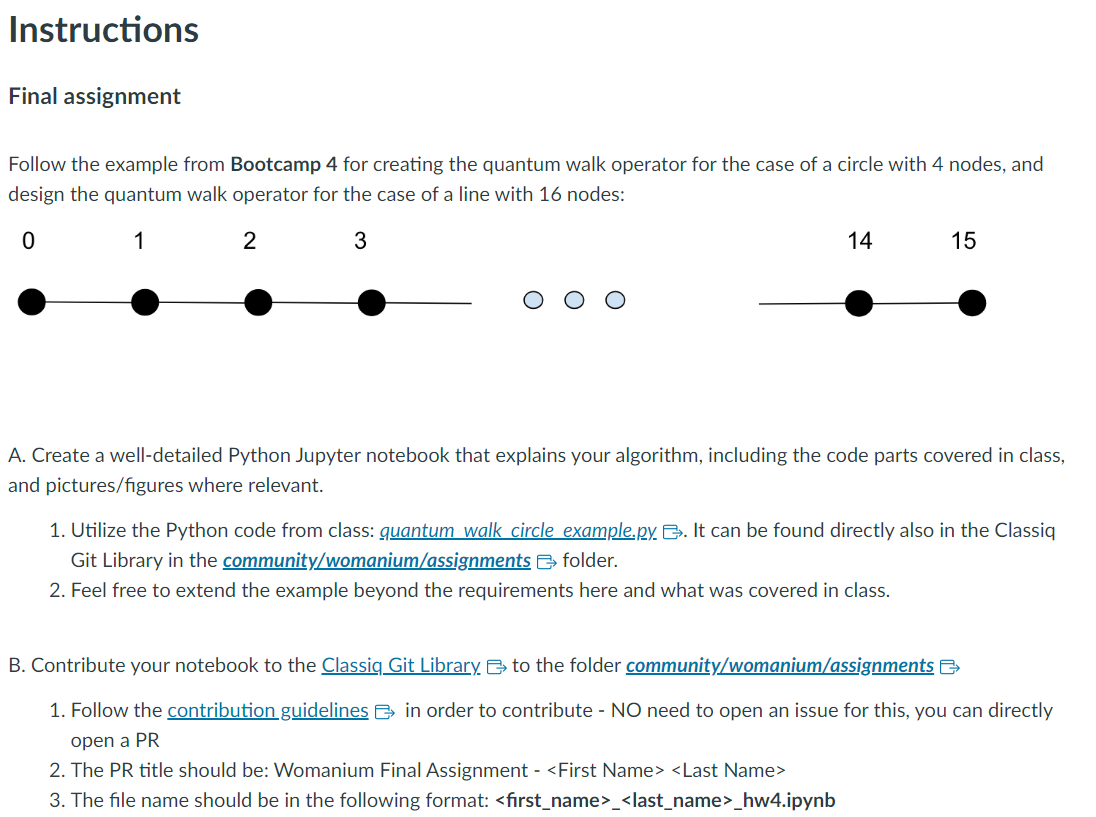

I have drawn inspiration from the quantum_walk_circle_example.py (attached in below cell) to design the quantum walk operator for the case of a line with 16 nodes. The main differences in the latter case will be:

a.The size of the system (4 qubits instead of 2)

b.The structure of the graph (line instead of circle)

c.The probabilities in the W_iteration function


In [1]:
from classiq import *

size = 2

@qfunc
def prepare_minus(x: QBit):
  X(x)
  H(x)


@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
  aux^=(x!=0)


@qfunc
def zero_diffuzer(x: QNum):
  aux = QNum('aux')
  allocate(1,aux)
  within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)


def W_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    prob = [0,0,0,0]
    prob[(i+1)% 4]=0.5
    prob[(i-1)% 4]=0.5
    print(f'State={i}, prob vec ={prob}')
    
    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuzer(adjacent_vertices)))


@qfunc 
def W_operator(vertices:QNum, adjacent_vertices: QNum):
    for i in range(2**size):
      W_iteration(i,vertices,adjacent_vertices)


@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
  res |= (((vertices+adjacent_vertices)%2) ==1)


@qfunc 
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
  repeat(count= x.len,
    iteration= lambda i: SWAP(x[i],y[i]))
  

@qfunc 
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))

@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size,vertices)
  hadamard_transform(vertices)
  allocate(size,adjacent_vertices)

  W_operator(vertices,adjacent_vertices)
  S_operator(vertices,adjacent_vertices)

In [2]:
from classiq import *

size = 4  # 4 qubits for 16 nodes

@qfunc
def prepare_minus(x: QBit):
    X(x)
    H(x)

@qfunc
def diffuzer_oracle(aux: Output[QBit], x: QNum):
    aux ^= (x != 0)

@qfunc
def zero_diffuzer(x: QNum):
    aux = QNum('aux')
    allocate(1, aux)
    within_apply(compute=lambda: prepare_minus(aux),
                 action=lambda: diffuzer_oracle)

def W_iteration(i: int, vertices: QNum, adjacent_vertices: QNum):
    prob = [0] * 16
    if i == 0:  # First node
        prob[1] = 1
    elif i == 15:  # Last node
        prob[14] = 1
    else:  # Middle nodes
        prob[i-1] = 0.5
        prob[i+1] = 0.5
    
    print(f'State={i}, prob vec ={prob}')
    
    control(ctrl=vertices == i,
            operand=lambda: within_apply(
                compute=lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
                action=lambda: zero_diffuzer(adjacent_vertices)))

@qfunc 
def W_operator(vertices: QNum, adjacent_vertices: QNum):
    for i in range(2**size):
        W_iteration(i, vertices, adjacent_vertices)

@qfunc
def edge_oracle(res: Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    # For a line, an edge exists if the difference between vertices is 1 or -1
    res |= ((vertices - adjacent_vertices == 1) | (adjacent_vertices - vertices == 1))

@qfunc 
def bitwise_swap(x: QArray[QBit], y: QArray[QBit]):
    repeat(count=x.len,
           iteration=lambda i: SWAP(x[i], y[i]))

@qfunc 
def S_operator(vertices: QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res, vertices, adjacent_vertices)
    control(ctrl=res == 1,
            operand=lambda: bitwise_swap(vertices, adjacent_vertices))

@qfunc 
def main(vertices: Output[QNum], adjacent_vertices: Output[QNum]):
    allocate(size, vertices)
    hadamard_transform(vertices)
    allocate(size, adjacent_vertices)
    W_operator(vertices, adjacent_vertices)
    S_operator(vertices, adjacent_vertices)

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

State=0, prob vec =[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 

Circuits as on Classiq:
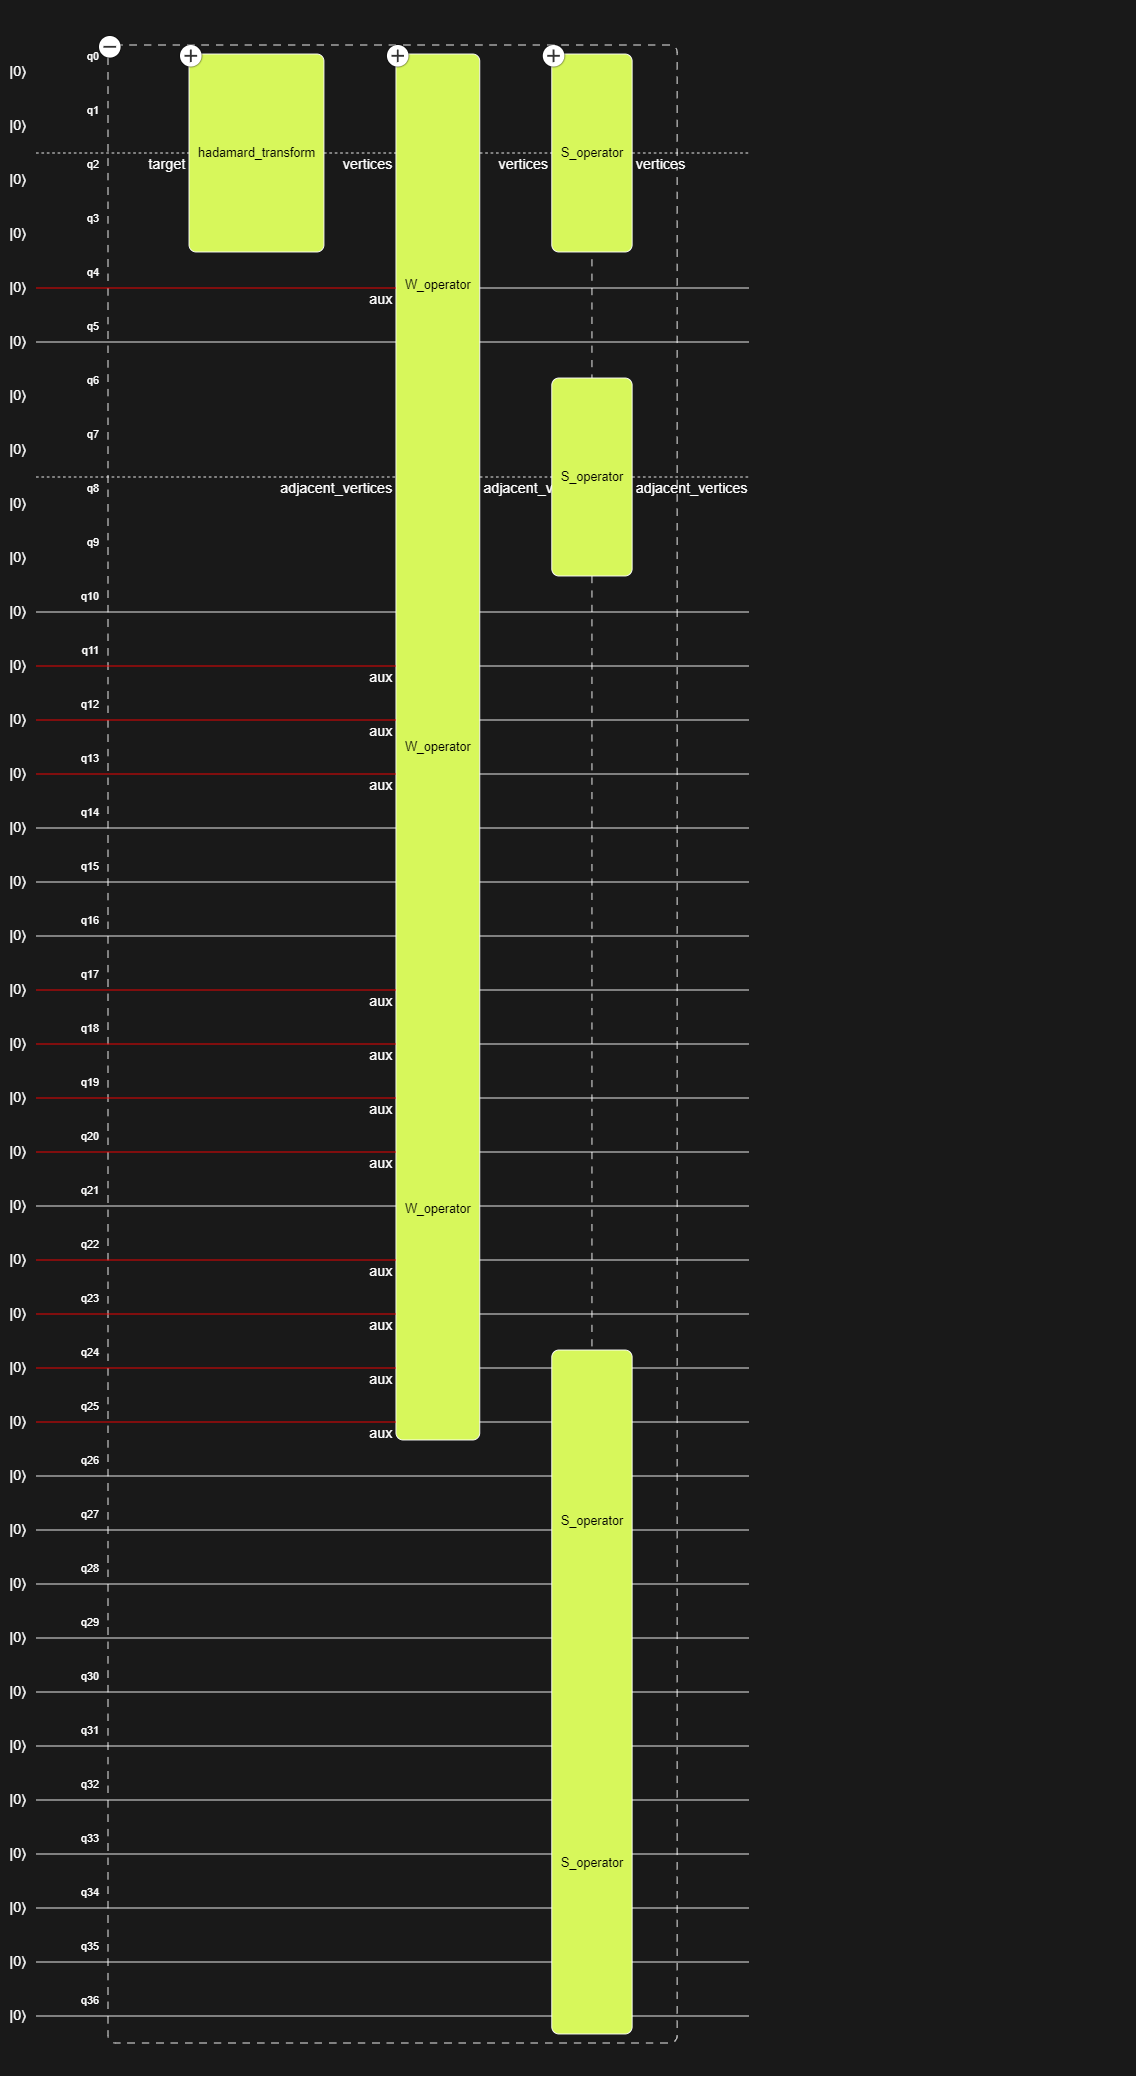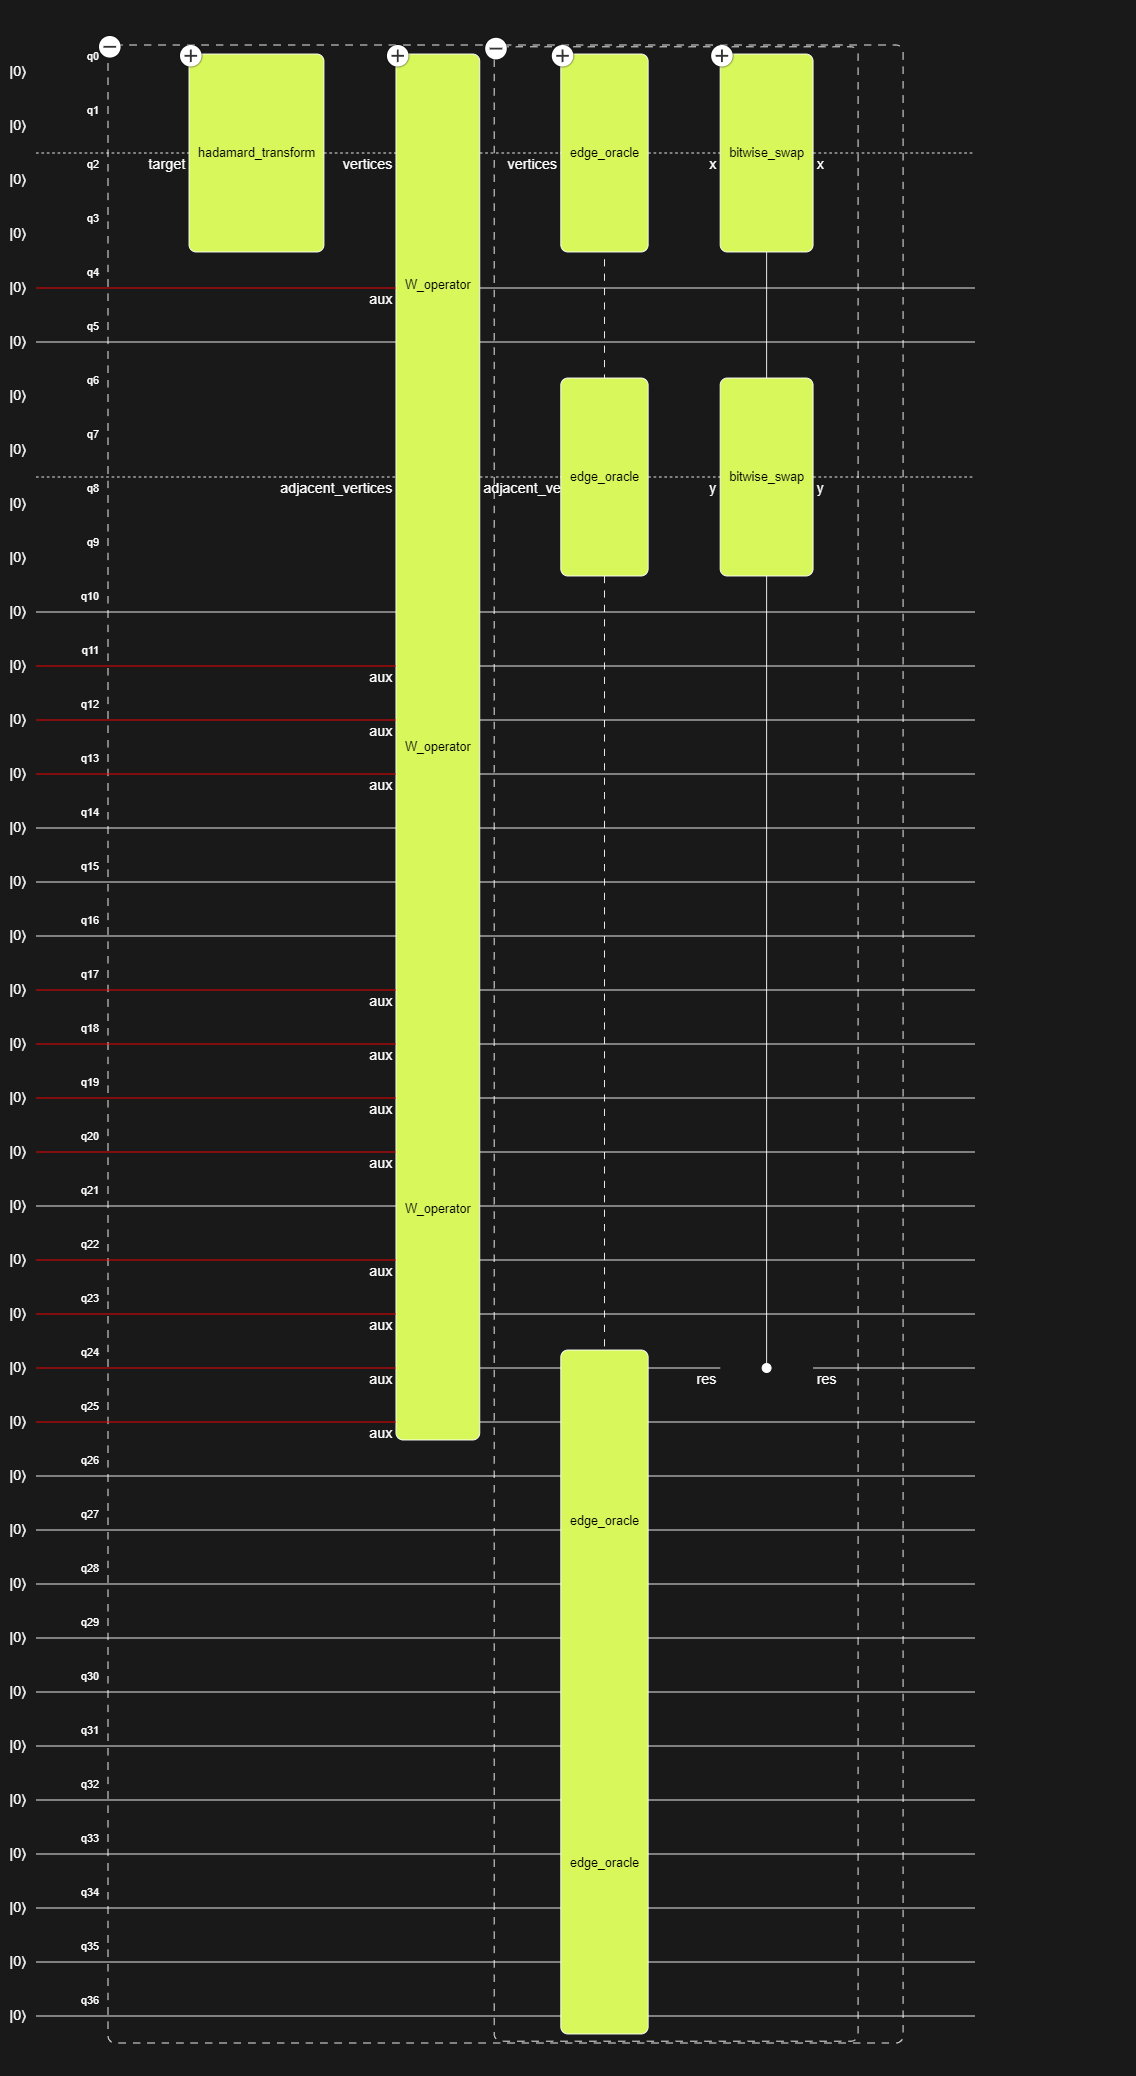

To generate qmod file for the same:

In [3]:
write_qmod(create_model(main), "exercise 6.12")

State=0, prob vec =[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 

Detailed Explanation of Quantum Walk Operator for a Line with 16 Nodes

1. Imports and Initialization:
   - The code imports necessary functions from the 'classiq' library.
   - 'size' is set to 4, representing 4 qubits to encode 16 nodes (2^4 = 16).

2. Utility Functions:

   a) prepare_minus(x: QBit):
      - Applies X gate followed by H gate to create the |-⟩ state.

   b) diffuzer_oracle(aux: Output[QBit], x: QNum):
      - Implements the diffusion oracle, flipping the aux qubit if x is non-zero.

   c) zero_diffuzer(x: QNum):
      - Applies the zero-state diffuser using an auxiliary qubit.

3. W_iteration Function:
   - Defines the iteration step for the walk operator.
   - Creates probability distribution for each node:
     * For node 0: Can only move to node 1
     * For node 15: Can only move to node 14
     * For other nodes: Equal probability to move left or right
   - Applies the walk step controlled by the current vertex state.

4. W_operator Function:
   - Applies W_iteration for all possible vertex states (0 to 15).

5. edge_oracle Function:
   - Determines if two vertices are adjacent in the line.
   - Sets the result qubit if the difference between vertices is 1 or -1.

6. bitwise_swap Function:
   - Swaps corresponding qubits between two quantum registers.

7. S_operator Function:
   - Implements the swap operator based on the edge oracle.
   - If vertices are adjacent, their states are swapped.

8. main Function:
   - Allocates and initializes the quantum registers.
   - Applies Hadamard transform to create superposition of all vertices.
   - Applies the W_operator followed by the S_operator.

9. Model Creation and Synthesis:
   - Creates a quantum model from the main function.
   - Synthesizes the quantum program.
   - Displays the resulting quantum circuit.

Key Concepts:

1. Quantum Walk:
   - This implements a discrete-time quantum walk on a line with 16 nodes.
   - The walk consists of two main parts: the coin flip (W_operator) and the shift (S_operator).

2. Coin Flip (W_operator):
   - For each node, it creates a superposition of moving left or right (or just one direction for end nodes).
   - This is analogous to flipping a coin in a classical random walk.

3. Shift (S_operator):
   - Swaps the amplitudes between adjacent nodes based on the edge structure of the line.

4. Graph Structure:
   - The line structure is encoded in both the W_iteration function (defining allowed moves) and the edge_oracle function (defining adjacency).

5. Quantum Registers:
   - 'vertices' register: Represents the current position.
   - 'adjacent_vertices' register: Used to create superpositions of adjacent states.

This quantum walk can be used for various quantum algorithms, such as spatial search or quantum transport simulations on a line graph.